## **第13课 Datetime库：显示时间**


**以下均为库函数，前置datetime，比如`datetime.datetime.now()`**

1. **`datetime.date`日期表示类，表示年月日**
2. **`datetime.time`时间表示类，表示小时，分钟，秒，毫秒**
3. **`datetime.datetime`日期和时间表示类，功能覆盖date和time类**
4. **`datetime.timedelta`与时间相隔有关的类**
5. **`datatime.tzinfo`与失去有关的信息表示类**
6. **`datetime.now()  或者 datetime.today() `1、获取当前的日期和时间**
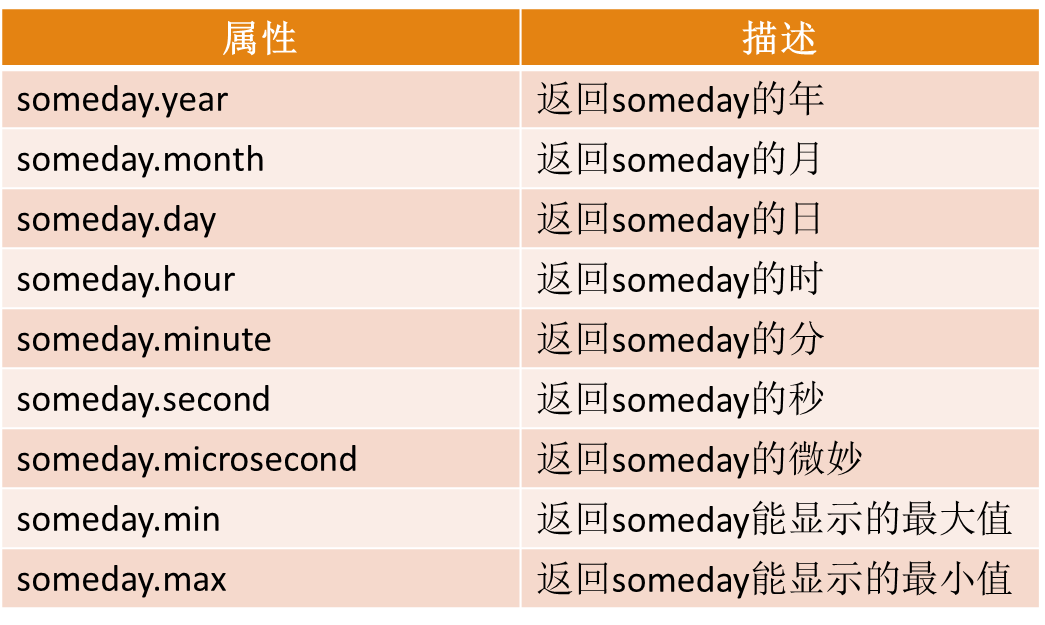

In [1]:
import datetime
today = datetime.datetime.now()
today2 = datetime.datetime.utcnow()
print(today)
print(today2)

2024-06-02 07:12:22.806362
2024-06-01 23:12:22.806362


In [2]:
#of course you can struct one
import datetime
someday=datetime.datetime(2004,5,23,5,18)
someday

datetime.datetime(2004, 5, 23, 5, 18)

#### ****当然也可以使用特定的库函数(.format)或者占位符（f-string）目的时格式化输出****

In [3]:
#Create a time and make a format output:
import datetime
someday2 = datetime.datetime(2024, 7, 7, 12, 0)
print(someday2.isoformat())

2024-07-07T12:00:00


In [4]:
#Create a time and make a format output:
import datetime

someday2 = datetime.datetime(2024, 7, 7, 12, 0)
formatted_date = someday2.strftime("%Y-%m-%d %H:%M:%S")

print(formatted_date)

2024-07-07 12:00:00


## **2.七段数码管绘制时间**
>>>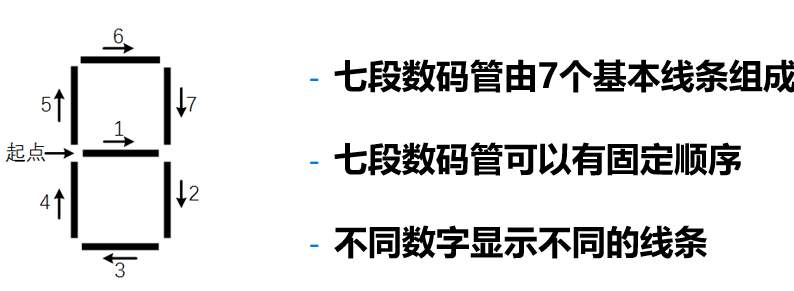


In [5]:
import time

# 定义七段数码管每个数字的表示形式
digits = [
    [" _ ", "| |", "|_|"],  # 0
    ["   ", "  |", "  |"],  # 1
    [" _ ", " _|", "|_ "],  # 2
    [" _ ", " _|", " _|"],  # 3
    ["   ", "|_|", "  |"],  # 4
    [" _ ", "|_ ", " _|"],  # 5
    [" _ ", "|_ ", "|_|"],  # 6
    [" _ ", "  |", "  |"],  # 7
    [" _ ", "|_|", "|_|"],  # 8
    [" _ ", "|_|", " _|"],  # 9
    ["   ", " . ", " . "]   # :
]

def display_time_in_seven_segment():
    while True:
        # 获取当前时间的字符串表示，格式为 HH:MM:SS
        current_time = time.strftime("%H:%M:%S")
        
        # 准备三行字符串来构建七段数码管显示
        line1, line2, line3 = "", "", ""
        
        # 根据当前时间构建每一行的显示
        for char in current_time:
            if char == ':':
                digit = digits[10]
            else:
                digit = digits[int(char)]
            line1 += digit[0] + " "
            line2 += digit[1] + " "
            line3 += digit[2] + " "
        
        # 清空屏幕（Windows系统使用'cls'，Unix系统使用'clear'）
        print("\033[H\033[J", end="")
        
        # 打印出每一行的内容
        print(line1)
        print(line2)
        print(line3)
        
        # 等待1秒后更新显示
        time.sleep(1)

if __name__ == "__main__":
    display_time_in_seven_segment()


 _   _       _   _              
| |   |  .   _| | |  .    | |_| 
|_|   |  .  |_  |_|  .    |   | 
 _   _       _   _           _  
| |   |  .   _| | |  .    | |_  
|_|   |  .  |_  |_|  .    |  _| 
 _   _       _   _           _  
| |   |  .   _| | |  .    | |_  
|_|   |  .  |_  |_|  .    | |_| 
 _   _       _   _           _  
| |   |  .   _| | |  .    |   | 
|_|   |  .  |_  |_|  .    |   | 
 _   _       _   _           _  
| |   |  .   _| | |  .    | |_| 
|_|   |  .  |_  |_|  .    | |_| 


KeyboardInterrupt: 

## **下面是turtle的，生成方式很有意思，虽然日期是错误的**

In [12]:
#SevenDigitsDrawV2.py
import turtle,time
def drawGap():		#获取间隔
	turtle.penup()
	turtle.fd(5)
def drawLine(draw):		#绘制单段数码管
	drawGap()
	turtle.pendown() if draw else turtle.penup()
	turtle.fd(40)
	drawGap()
	turtle.right(90)
def drawDigit(digit):	#根据数字绘制七段数码管
	drawLine(True) if digit in [2,3,4,5,6,7,8,9] else drawLine(False)
	drawLine(True) if digit in [0,1,3,4,5,6,7,8,9] else drawLine(False)
	drawLine(True) if digit in [0,2,3,5,6,8,9] else drawLine(False)
	drawLine(True) if digit in [0,2,6,8] else drawLine(False)
	turtle.left(90)
	drawLine(True) if digit in [0,4,5,6,8,9] else drawLine(False)
	drawLine(True) if digit in [0,2,3,5,6,7,8,9] else drawLine(False)
	drawLine(True) if digit in [0,1,2,3,4,7,8,9] else drawLine(False)
	turtle.left(180)
	turtle.penup()	#为绘制后续数字确定位置
	turtle.fd(20)	#为绘制后续数字确定位置
def drawDate(date):		#data为日期，格式为'%Y-%m=%d+'
	turtle.pencolor("red")
	for i in date:
		if i=='-':
			turtle.write('年',font=("Arial",18,"normal"))
			turtle.pencolor("green")
			turtle.fd(40)
		elif i=='=':
			turtle.write('月',font=("Arial",18,"normal"))
			turtle.pencolor("blue")
			turtle.fd(40)
		elif i=='+':
			turtle.write('日',font=("Arial",18,"normal"))
		else:
			drawDigit(eval(i))  
def main():
	turtle.setup(800,350,200,200) 
	turtle.penup()
	turtle.fd(-300)
	turtle.pensize(5)
	drawDate(time.strftime('%Y-%m=%d+',time.gmtime()))
	turtle.hideturtle()
	turtle.done()
main()

Terminator: 